Stage 1, MAE: 23.856614989433403
Stage 2, MAE: 23.69153842405088
Stage 3, MAE: 24.015820107082163
Stage 4, MAE: 23.972652454222843
Stage 5, MAE: 23.676336418012855
Stage 6, MAE: 23.4625631916606
Stage 7, MAE: 23.508091656406574
Stage 8, MAE: 23.534368597132726
Stage 9, MAE: 23.328134607257425
Stage 10, MAE: 23.107874089937297
Stage 11, MAE: 23.12175146374365
Stage 12, MAE: 23.293213307575478
Stage 13, MAE: 23.245613390176462
Stage 14, MAE: 23.2467270704792
Stage 15, MAE: 23.10280292133528
Stage 16, MAE: 23.019994668869145
Stage 17, MAE: 23.081565651911717
Stage 18, MAE: 23.04995215046104
Stage 19, MAE: 22.948660295302908
Stage 20, MAE: 22.902471141361033
Stage 21, MAE: 22.931223081336334
Stage 22, MAE: 22.90238219292723
Stage 23, MAE: 22.858084027506127
Stage 24, MAE: 22.90037239680316
Stage 25, MAE: 22.823547645594214
Stage 26, MAE: 22.79500910232825
Stage 27, MAE: 22.78688181680736
Stage 28, MAE: 22.777570190491165
Stage 29, MAE: 22.789624831948807
Stage 30, MAE: 22.831130896671624
S

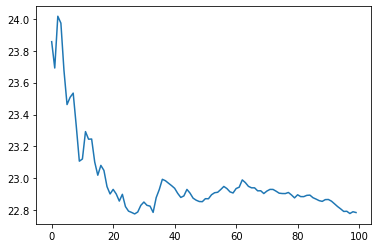

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train = np.load("../data/features_rand_train.npy")[:,:3]
X_val = np.load("../data/features_rand_test.npy")[:,:3]

# normalize
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train-mean)/std
X_val = (X_val-mean)/std

raw_data_train = np.load("../data/simu_20000_0.1_90_140_train.npy")
raw_data_test = np.load("../data/simu_10000_0.1_141_178_test.npy")

y_train = raw_data_train[:,1004].reshape(20000)
y_val = raw_data_test[:,1004].reshape(10000)

# 创建随机森林回归模型
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=22)

# 存储每轮训练后在验证集上的MAE
mae_per_stage = []

# 训练每轮并记录性能
for stage in range(1, rf_regressor.n_estimators + 1):
    rf_regressor.n_estimators = stage  # 设置当前阶段的树数量
    rf_regressor.fit(X_train, y_train)
    y_pred_stage = rf_regressor.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred_stage)
    mae_per_stage.append(mae)
    print(f'Stage {stage}, MAE: {mae}')

# 找到最佳轮数（即MAE最小的轮数）
best_stage = np.argmin(mae_per_stage)

# 使用最佳轮数来重新训练模型
rf_regressor_best = RandomForestRegressor(n_estimators=best_stage + 1, random_state=42)
rf_regressor_best.fit(X_train, y_train)

# 在测试集上进行预测
y_test_pred = rf_regressor_best.predict(X_val)

# 输出预测结果或进行其他后续操作
print('Predictions on Test Set:', y_test_pred)

plt.plot(mae_per_stage)
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X_train = np.load("../data/features_train.npy")[:,:17]
X_val = np.load("../data/features_test.npy")[:,:17]

# normalize
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train-mean)/std
X_val = (X_val-mean)/std

# 创建决策树分类器
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 获取特征重要性
feature_importances = dt_classifier.feature_importances_

# 打印每个特征的重要性
for importance in feature_importances:
    print(importance)

# 可视化特征重要性
# plt.bar(iris.feature_names, feature_importances)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.title('Feature Importance in Decision Tree')
# plt.show()


0.05199931650429927
0.05673980516835089
0.0751180242764631
0.05085666685686236
0.08507049514740084
0.03812758531606236
0.05487887611764389
0.036351159421215716
0.07591519085193935
0.0
0.039934274185216945
0.07184400302823549
0.07952758007142577
0.10036610875323494
0.04939036771121694
0.08672812104855267
0.04715242554187938
